In [28]:
#some standard libraries
import numpy as np
import math
import matplotlib.pyplot as plt
#library for power-law red-noise generation
import colorednoise as cn
import scipy

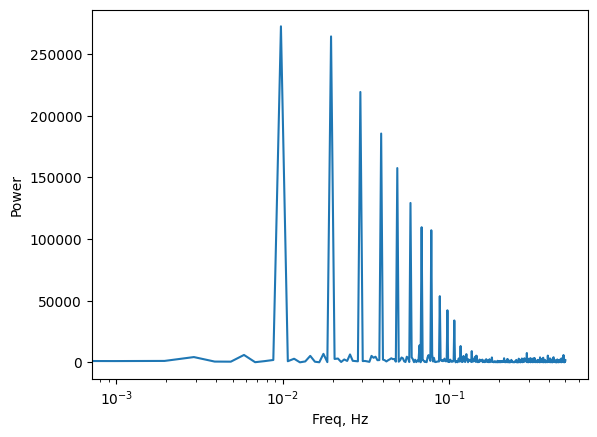

In [35]:
#function, which calculates sequence of Gaussians
def gausspulse(t, num, sigma):
    signal=np.zeros(len(t))
    time_steps=[len(t)/num*(i+1) for i in range(num)]
    for i in range(len(time_steps)):
        signal+=np.exp(-sigma*(t-time_steps[i])**2)
    return signal

#generate the signal
N=1024 #number of elements in the list
f0=1/100 #frequency of periodic signal
A=10 #amplitude
phi0=np.random.uniform(0,1) # random phase

time_list=np.arange(0, N, 1)
signal=A*gausspulse(time_list, int(N*f0), 0.1)
err=[1. for i in range(N)]
noise=np.random.normal(0.,1, N) #white Gaussian noise
sig_obs=signal+noise 

#DFT
power_FT=abs(np.fft.fft(sig_obs))**2
freq_FT=np.fft.fftfreq(len(sig_obs), 1.)
plt.plot(freq_FT[0:int(N/2)], power_FT[0:int(N/2)])
plt.xlabel("Freq, Hz")
plt.ylabel("Power")
plt.xscale("log")
# plt.yscale("log")
plt.show()